# Introduction

### Notes

1. Might want to increase the MAX_STEP and equation length -- muzero might be able to exploit longer things. 
2. Check how large the depth search is
3. Action masking, illegal action.
4. Debug the env... there is some shenanigans going on... aren't illegal equations supposedly impossible?
5. Then curriculum learning

Mean Rewards: [0.24208333333333332, 0.3475, 0.34312499999999996, 0.21624999999999997, 0.41687499999999994, 0.41374999999999995, 0.93375, 0.808125, 1.0, 1.0, 1.0, 1.0, 0.5475, 0.86375, 1.0, -0.040000000000000036, 0.026249999999999968, 0.41625, -0.040000000000000036, 0.29]
Min Rewards: [-0.1100000000000001, -0.08000000000000007, -0.10000000000000009, -0.1100000000000001, -0.09000000000000008, -0.10000000000000009, -0.06000000000000005, -0.040000000000000036, 1.0, 1.0, 1.0, 1.0, -0.040000000000000036, -0.09000000000000008, 1.0, -0.040000000000000036, -0.040000000000000036, -0.040000000000000036, -0.040000000000000036, -0.06000000000000005]
Max Rewards: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.040000000000000036, 1.0, 1.0, -0.040000000000000036, 1.0]
Timesteps: [176, 220, 258, 298, 334, 372, 390, 412, 428, 448, 464, 482, 518, 542, 558, 606, 652, 686, 734, 776]


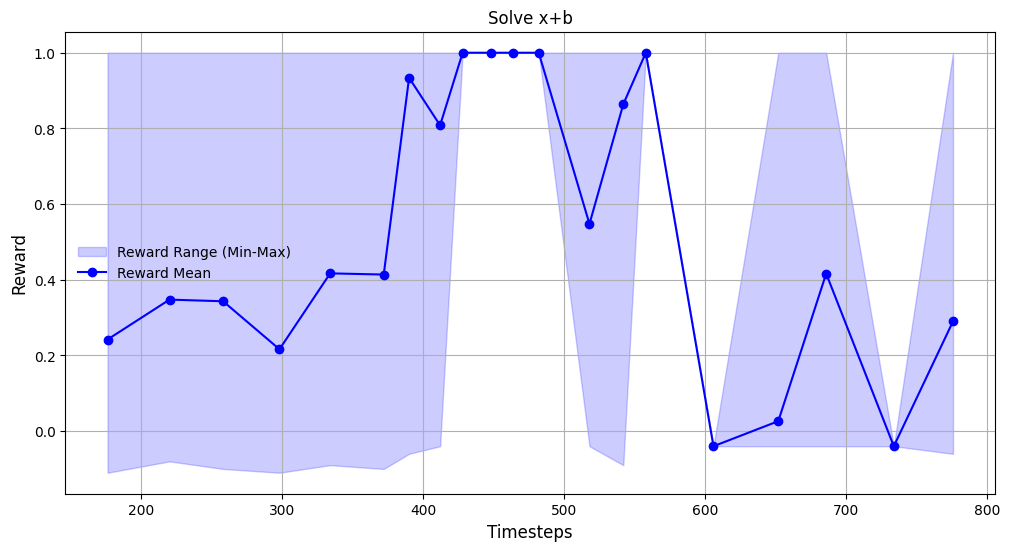

First max reward > 100 at timestep: 176 with reward: 1.0


In [6]:
import os
import matplotlib.pyplot as plt

# Path to the experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")

# Initialize storage for reward statistics and episode counts
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []  # Will store the total_envstep_count

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:  # Extract total_envstep_count
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug the parsed data
print("Mean Rewards:", mean_rewards)
print("Min Rewards:", min_rewards)
print("Max Rewards:", max_rewards)
print("Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# Plot the learning curve with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(
    timesteps, mean_rewards,  fmt="-o", capsize=5, label="Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Reward Range (Min-Max)"
)
plt.xlabel("Timesteps")  # Change from Episodes to Timesteps
plt.ylabel("Reward")
plt.title("Solve x+b")
plt.legend()
plt.grid(True)
plt.show()


# Ensure the lists are not empty
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 100 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your data.")

Training Mean Rewards: [0.24208333333333332, 0.3475, 0.34312499999999996, 0.21624999999999997, 0.41687499999999994, 0.41374999999999995, 0.93375, 0.808125, 1.0, 1.0, 1.0, 1.0, 0.5475, 0.86375, 1.0, -0.040000000000000036, 0.026249999999999968, 0.41625, -0.040000000000000036, 0.29, -0.03625000000000003, 0.351875, 0.09624999999999997, 0.35124999999999995, 0.48, 0.024999999999999967, -0.040000000000000036, -0.038750000000000034, 0.41625, 0.08499999999999996, 0.14812499999999995, 0.15562499999999996, -0.040000000000000036]
Training Min Rewards: [-0.1100000000000001, -0.08000000000000007, -0.10000000000000009, -0.1100000000000001, -0.09000000000000008, -0.10000000000000009, -0.06000000000000005, -0.040000000000000036, 1.0, 1.0, 1.0, 1.0, -0.040000000000000036, -0.09000000000000008, 1.0, -0.040000000000000036, -0.040000000000000036, -0.040000000000000036, -0.040000000000000036, -0.06000000000000005, -0.06000000000000005, -0.08000000000000007, -0.040000000000000036, -0.040000000000000036, -0.0

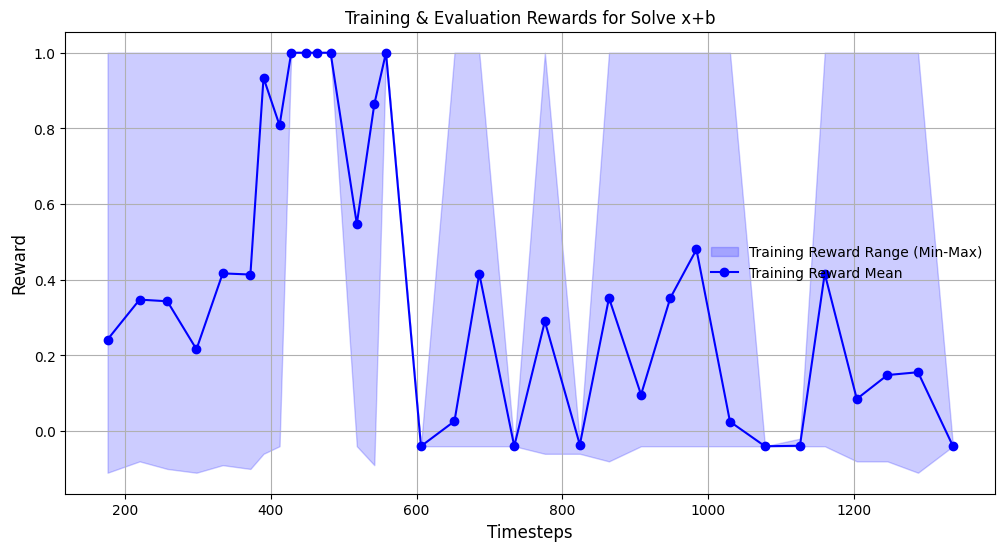

First max reward > 1 at timestep: 176 with reward: 1.0
The evaluation lists are empty. Please check your evaluation data.


In [11]:
import os
import matplotlib.pyplot as plt

# Paths to experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")
evaluator_log_dir = os.path.join(data_dir, "log", "evaluator")

# Initialize storage for reward statistics
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug: Print parsed training data
print("Training Mean Rewards:", mean_rewards)
print("Training Min Rewards:", min_rewards)
print("Training Max Rewards:", max_rewards)
print("Training Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# ------------------------- EVALUATION LOG READING -------------------------

# Initialize storage for evaluation statistics
eval_mean_rewards = []
eval_min_rewards = []
eval_max_rewards = []
eval_episode_return_means = []
eval_timesteps = []

# Read the `evaluator_logger.txt` file
evaluator_log_file = os.path.join(evaluator_log_dir, "evaluator_logger.txt")
if os.path.isfile(evaluator_log_file):
    with open(evaluator_log_file, "r") as f:
        for line in f:
            # Extract only numerical lines, avoiding column headers
            if "reward_mean" in line and "Name" not in line:
                parts = line.split("|")
                try:
                    eval_mean_rewards.append(float(parts[-4].strip()))
                    eval_min_rewards.append(float(parts[-1].strip()))
                    eval_max_rewards.append(float(parts[-2].strip()))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")
            elif "eval_episode_return_mean" in line:
                try:
                    eval_episode_return_means.append(float(line.split("|")[-1].strip()))
                except ValueError:
                    print(f"Skipping invalid eval_episode_return_mean line: {line.strip()}")
            elif "envstep_count" in line and "ckpt_name" not in line:
                try:
                    eval_timesteps.append(int(float(line.split("|")[-1].strip())))  # Convert to integer
                except ValueError:
                    print(f"Skipping invalid envstep_count line: {line.strip()}")
else:
    print(f"No evaluator log file found at {evaluator_log_file}")
    exit()

# Debug: Print parsed evaluation data
print("Evaluation Mean Rewards:", eval_mean_rewards)
print("Evaluation Min Rewards:", eval_min_rewards)
print("Evaluation Max Rewards:", eval_max_rewards)
print("Evaluation Episode Return Means:", eval_episode_return_means)
print("Evaluation Timesteps:", eval_timesteps)

# ------------------------- PLOTTING -------------------------

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.errorbar(
    timesteps, mean_rewards, fmt="-o", capsize=5, label="Training Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Training Reward Range (Min-Max)"
)

# Plot evaluation rewards
if eval_timesteps:
    plt.errorbar(
        eval_timesteps, eval_mean_rewards, fmt="-s", capsize=5, label="Eval Reward Mean", color="red"
    )
    plt.fill_between(
        eval_timesteps, eval_min_rewards, eval_max_rewards, color="red", alpha=0.2, label="Eval Reward Range (Min-Max)"
    )

plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Training & Evaluation Rewards for Solve x+b")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------- FIRST SUCCESSFUL TIMESTEP -------------------------

# Ensure the lists are not empty before checking for max rewards
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 1 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your training data.")

if eval_max_rewards and eval_timesteps:
    for i, reward in enumerate(eval_max_rewards):
        if reward >= 1:
            print(f"First evaluation max reward > 1 at timestep: {eval_timesteps[i]} with reward: {reward}")
            break
else:
    print("The evaluation lists are empty. Please check your evaluation data.")

Training Mean Rewards: [0.25203125, 0.21687499999999998, 0.14624999999999994, 0.35062499999999996, 0.15249999999999997, 0.33999999999999997, 0.14874999999999997, 0.27749999999999997, 0.15312499999999996, 0.21062499999999995, 0.15124999999999997, 0.40875, 0.34375, 0.341875, 0.08312499999999996, 0.27375, 0.346875, -0.04187500000000004, 0.33999999999999997, 0.48374999999999996, 0.345625, 0.41812499999999997, 0.34562499999999996, 0.07999999999999996, 0.21687499999999998, 0.15999999999999998, 0.14687499999999995, 0.07187499999999995, 0.27124999999999994, 0.14999999999999997, 0.345625, 0.34624999999999995, 0.21374999999999994, 0.464375, 0.41562499999999997, 0.21187499999999998, 0.34062499999999996, 0.021249999999999963, 0.08499999999999996, 0.4225, 0.21249999999999997, 0.281875, 0.274375, 0.40875, 0.07624999999999996, 0.07749999999999996, 0.2875, 0.20437499999999995, 0.28625, 0.21062499999999995, 0.20124999999999998, 0.41312499999999996, 0.279375, 0.21562499999999998, 0.21687499999999998, 0.

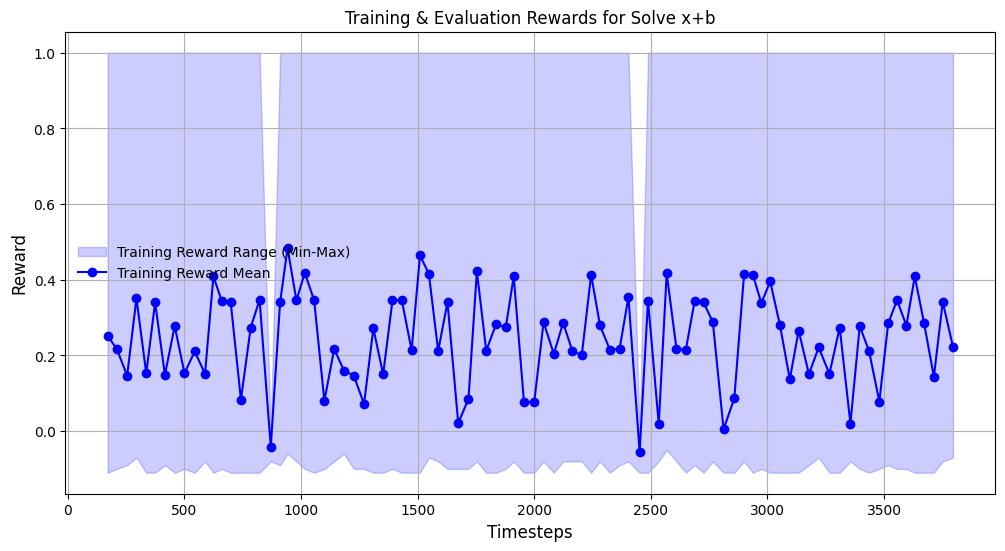

First max reward > 1 at timestep: 170 with reward: 1.0
The evaluation lists are empty. Please check your evaluation data.


In [33]:
import os
import matplotlib.pyplot as plt

# Paths to experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")
evaluator_log_dir = os.path.join(data_dir, "log", "evaluator")

# Initialize storage for reward statistics
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug: Print parsed training data
print("Training Mean Rewards:", mean_rewards)
print("Training Min Rewards:", min_rewards)
print("Training Max Rewards:", max_rewards)
print("Training Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# ------------------------- EVALUATION LOG READING -------------------------

# Initialize storage for evaluation statistics
eval_mean_rewards = []
eval_min_rewards = []
eval_max_rewards = []
eval_episode_return_means = []
eval_timesteps = []

# Read the `evaluator_logger.txt` file
evaluator_log_file = os.path.join(evaluator_log_dir, "evaluator_logger.txt")
if os.path.isfile(evaluator_log_file):
    with open(evaluator_log_file, "r") as f:
        for line in f:
            # Extract only numerical lines, avoiding column headers
            if "reward_mean" in line and "Name" not in line:
                parts = line.split("|")
                try:
                    eval_mean_rewards.append(float(parts[-4].strip()))
                    eval_min_rewards.append(float(parts[-1].strip()))
                    eval_max_rewards.append(float(parts[-2].strip()))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")
            elif "eval_episode_return_mean" in line:
                try:
                    eval_episode_return_means.append(float(line.split("|")[-1].strip()))
                except ValueError:
                    print(f"Skipping invalid eval_episode_return_mean line: {line.strip()}")
            elif "envstep_count" in line and "ckpt_name" not in line:
                try:
                    eval_timesteps.append(int(float(line.split("|")[-1].strip())))  # Convert to integer
                except ValueError:
                    print(f"Skipping invalid envstep_count line: {line.strip()}")
else:
    print(f"No evaluator log file found at {evaluator_log_file}")
    exit()

# Debug: Print parsed evaluation data
print("Evaluation Mean Rewards:", eval_mean_rewards)
print("Evaluation Min Rewards:", eval_min_rewards)
print("Evaluation Max Rewards:", eval_max_rewards)
print("Evaluation Episode Return Means:", eval_episode_return_means)
print("Evaluation Timesteps:", eval_timesteps)

# ------------------------- PLOTTING -------------------------

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.errorbar(
    timesteps, mean_rewards, fmt="-o", capsize=5, label="Training Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Training Reward Range (Min-Max)"
)

# Plot evaluation rewards
if eval_timesteps:
    plt.errorbar(
        eval_timesteps, eval_mean_rewards, fmt="-s", capsize=5, label="Eval Reward Mean", color="red"
    )
    plt.fill_between(
        eval_timesteps, eval_min_rewards, eval_max_rewards, color="red", alpha=0.2, label="Eval Reward Range (Min-Max)"
    )

plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Training & Evaluation Rewards for Solve x+b")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------- FIRST SUCCESSFUL TIMESTEP -------------------------

# Ensure the lists are not empty before checking for max rewards
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 1 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your training data.")

if eval_max_rewards and eval_timesteps:
    for i, reward in enumerate(eval_max_rewards):
        if reward >= 1:
            print(f"First evaluation max reward > 1 at timestep: {eval_timesteps[i]} with reward: {reward}")
            break
else:
    print("The evaluation lists are empty. Please check your evaluation data.")

Training Mean Rewards: [0.31328125, 0.35, 0.3475, 0.6125, 0.345, 0.36250000000000004, 0.08499999999999996, 0.34875, 0.3475, 0.48375, 0.21249999999999997, 0.35, 0.46499999999999997, 0.33875, 0.22374999999999998, 0.07749999999999996, -0.04875000000000004, 0.34124999999999994, 0.355, 0.3424999999999999, 0.20124999999999996, 0.20874999999999996, 0.21249999999999997, 0.23249999999999998, 0.08999999999999997, 0.21374999999999997, 0.08749999999999997, 0.19624999999999995, 0.20499999999999996, 0.07499999999999996, 0.08749999999999997, 0.22374999999999998, 0.48, 0.35124999999999995, 0.22374999999999998, -0.07125000000000006, 0.33624999999999994, -0.04875000000000004, 0.07874999999999996, 0.07874999999999996, 0.21874999999999997, 0.4825, -0.051250000000000046, 0.34875, 0.3425, 0.35874999999999996, -0.04625000000000004, 0.34249999999999997, 0.48624999999999996, 0.07749999999999996, 0.09499999999999997, 0.22124999999999997, 0.08499999999999996, 0.09124999999999997, 0.05499999999999994, 0.3525, 0.2

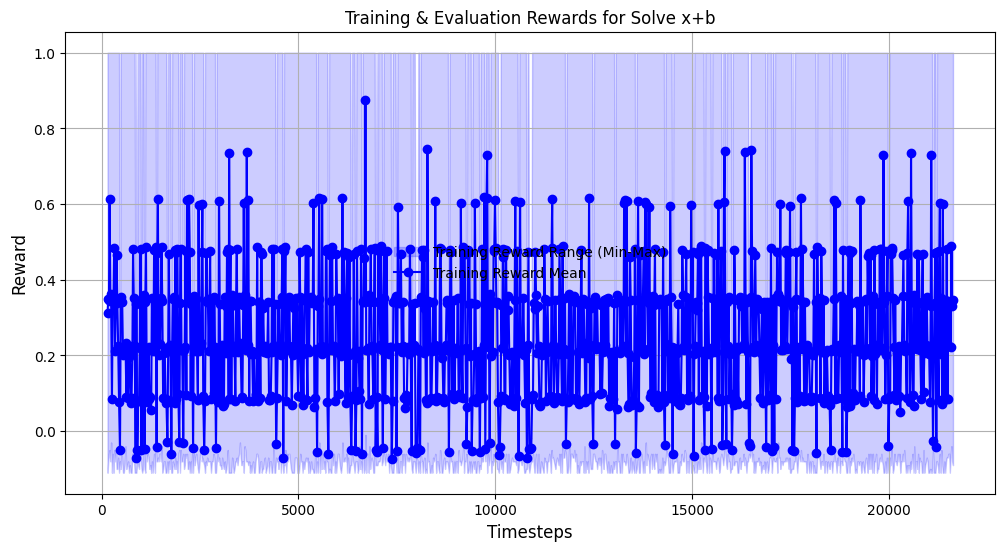

First max reward > 1 at timestep: 152 with reward: 1.0
The evaluation lists are empty. Please check your evaluation data.


In [38]:
import os
import matplotlib.pyplot as plt

# Paths to experiment logs
data_dir = "/Users/Kev/Documents/research/LightZero/data_muzero/x+b"
collector_log_dir = os.path.join(data_dir, "log", "collector")
evaluator_log_dir = os.path.join(data_dir, "log", "evaluator")

# Initialize storage for reward statistics
mean_rewards = []
min_rewards = []
max_rewards = []
timesteps = []

# Read the `collector_logger.txt` file
collector_log_file = os.path.join(collector_log_dir, "collector_logger.txt")
if os.path.isfile(collector_log_file):
    with open(collector_log_file, "r") as f:
        for line in f:
            if "reward_mean" in line:
                mean_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_min" in line:
                min_rewards.append(float(line.split(":")[-1].strip()))
            elif "reward_max" in line:
                max_rewards.append(float(line.split(":")[-1].strip()))
            elif "total_envstep_count" in line:
                timesteps.append(int(line.split(":")[-1].strip()))
else:
    print(f"No collector log file found at {collector_log_file}")
    exit()

# Debug: Print parsed training data
print("Training Mean Rewards:", mean_rewards)
print("Training Min Rewards:", min_rewards)
print("Training Max Rewards:", max_rewards)
print("Training Timesteps:", timesteps)

# Ensure reward_errors have non-negative values
reward_errors = [
    [max(0, mean - min_val) for mean, min_val in zip(mean_rewards, min_rewards)],  # Lower error
    [max(0, max_val - mean) for max_val, mean in zip(max_rewards, mean_rewards)]   # Upper error
]

# ------------------------- EVALUATION LOG READING -------------------------

# Initialize storage for evaluation statistics
eval_mean_rewards = []
eval_min_rewards = []
eval_max_rewards = []
eval_episode_return_means = []
eval_timesteps = []

# Read the `evaluator_logger.txt` file
evaluator_log_file = os.path.join(evaluator_log_dir, "evaluator_logger.txt")
if os.path.isfile(evaluator_log_file):
    with open(evaluator_log_file, "r") as f:
        for line in f:
            # Extract only numerical lines, avoiding column headers
            if "reward_mean" in line and "Name" not in line:
                parts = line.split("|")
                try:
                    eval_mean_rewards.append(float(parts[-4].strip()))
                    eval_min_rewards.append(float(parts[-1].strip()))
                    eval_max_rewards.append(float(parts[-2].strip()))
                except ValueError:
                    print(f"Skipping invalid line: {line.strip()}")
            elif "eval_episode_return_mean" in line:
                try:
                    eval_episode_return_means.append(float(line.split("|")[-1].strip()))
                except ValueError:
                    print(f"Skipping invalid eval_episode_return_mean line: {line.strip()}")
            elif "envstep_count" in line and "ckpt_name" not in line:
                try:
                    eval_timesteps.append(int(float(line.split("|")[-1].strip())))  # Convert to integer
                except ValueError:
                    print(f"Skipping invalid envstep_count line: {line.strip()}")
else:
    print(f"No evaluator log file found at {evaluator_log_file}")
    exit()

# Debug: Print parsed evaluation data
print("Evaluation Mean Rewards:", eval_mean_rewards)
print("Evaluation Min Rewards:", eval_min_rewards)
print("Evaluation Max Rewards:", eval_max_rewards)
print("Evaluation Episode Return Means:", eval_episode_return_means)
print("Evaluation Timesteps:", eval_timesteps)

# ------------------------- PLOTTING -------------------------

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.errorbar(
    timesteps, mean_rewards, fmt="-o", capsize=5, label="Training Reward Mean", color="blue"
)
plt.fill_between(
    timesteps, min_rewards, max_rewards, color="blue", alpha=0.2, label="Training Reward Range (Min-Max)"
)

# Plot evaluation rewards
if eval_timesteps:
    plt.errorbar(
        eval_timesteps, eval_mean_rewards, fmt="-s", capsize=5, label="Eval Reward Mean", color="red"
    )
    plt.fill_between(
        eval_timesteps, eval_min_rewards, eval_max_rewards, color="red", alpha=0.2, label="Eval Reward Range (Min-Max)"
    )

plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Training & Evaluation Rewards for Solve x+b")
plt.legend()
plt.grid(True)
plt.show()

# ------------------------- FIRST SUCCESSFUL TIMESTEP -------------------------

# Ensure the lists are not empty before checking for max rewards
if max_rewards and timesteps:
    for i, reward in enumerate(max_rewards):
        if reward >= 1:
            print(f"First max reward > 1 at timestep: {timesteps[i]} with reward: {reward}")
            break
else:
    print("The lists are empty. Please check your training data.")

if eval_max_rewards and eval_timesteps:
    for i, reward in enumerate(eval_max_rewards):
        if reward >= 1:
            print(f"First evaluation max reward > 1 at timestep: {eval_timesteps[i]} with reward: {reward}")
            break
else:
    print("The evaluation lists are empty. Please check your evaluation data.")